# Importação biblioteca e leitura da base de dados

In [5]:
import pandas as pd

pd.set_option('display.max_columns', None)

dfdengue = pd.read_csv('DENGBR21.csv', low_memory=False)
dfdengue

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,TPAUTOCTO,COUFINF,COPAISINF,COMUNINF,CLASSI_FIN,CRITERIO,DOENCA_TRA,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,MANI_HEMOR,EPISTAXE,GENGIVO,METRO,PETEQUIAS,HEMATURA,SANGRAM,LACO_N,PLASMATICO,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A90,20210223,202108,2021,12,120020,1941.0,6788637.0,20210220,202107,2020.0,3008,F,6.0,4.0,10.0,12,120020.0,1941.0,1.0,20210223,NaN,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,,NaN,20210223,2.0,,NaN,,NaN,NaN,NaN,NaN,2.0,,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,1.0,,20210511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,20210511,NaN,NaN,NaN
1,2,A90,20210315,202111,2021,12,120033,1941.0,9542566.0,20210220,202107,1984.0,4036,M,6.0,4.0,NaN,12,120033.0,1941.0,1.0,20210315,NaN,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,20210317,2.0,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,,20210315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,20210408,NaN,NaN,NaN
2,2,A90,20210128,202104,2021,12,120033,1941.0,2000105.0,20210112,202102,1944.0,4076,M,6.0,4.0,NaN,12,120033.0,1941.0,1.0,20210128,NaN,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,20210128,3.0,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,,20210128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,20210210,NaN,NaN,NaN
3,2,A90,20210210,202106,2021,12,120033,1941.0,2000083.0,20210129,202104,1995.0,4025,F,5.0,4.0,NaN,12,120033.0,1941.0,1.0,20210210,NaN,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,20210210,2.0,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,NaN,,20210210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,20210322,NaN,NaN,NaN
4,2,A90,20210303,202109,2021,12,120033,1941.0,2000083.0,20210226,202108,1969.0,4051,F,5.0,4.0,NaN,12,120033.0,1941.0,1.0,20210303,NaN,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,20210303,,,1.0,NaN,NaN,,NaN,,NaN,,NaN,,NaN,NaN,NaN,NaN,2.0,,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,NaN,NaN,1.0,,20210303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,20210405,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# Checagem tipo de Dengue

In [7]:
print(dfdengue['ID_AGRAVO'].value_counts(dropna=False))

ID_AGRAVO
A90    1010359
Name: count, dtype: int64


# Consulta de colunas totalmente vazias

In [9]:
total_linhas = dfdengue.shape[0]

nulos_por_coluna = dfdengue.isnull().sum()

colunas_vazias = nulos_por_coluna[nulos_por_coluna == total_linhas]

print(colunas_vazias.to_string())

print(f"Total de colunas completamente vazias: {len(colunas_vazias)}")

TPAUTOCTO     1010359
COUFINF       1010359
COPAISINF     1010359
COMUNINF      1010359
DOENCA_TRA    1010359
MANI_HEMOR    1010359
EPISTAXE      1010359
GENGIVO       1010359
METRO         1010359
PETEQUIAS     1010359
HEMATURA      1010359
SANGRAM       1010359
LACO_N        1010359
PLASMATICO    1010359
EVIDENCIA     1010359
PLAQ_MENOR    1010359
CON_FHD       1010359
COMPLICA      1010359
CS_FLXRET     1010359
FLXRECEBI     1010359
MIGRADO_W     1010359
Total de colunas completamente vazias: 21


# Exclusão de colunas totalmente vazias

In [11]:
print(dfdengue.columns.to_list())

['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI', 'SEM_PRI', 'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE', 'DT_CHIK_S1', 'DT_CHIK_S2', 'DT_PRNT', 'RES_CHIKS1', 'RES_CHIKS2', 'RESUL_PRNT', 'DT_SORO', 'RESUL_SORO', 'DT_NS1', 'RESUL_NS1', 'DT_VIRAL', 'RESUL_VI_N', 'DT_PCR', 'RESUL_PCR_', 'SOROTIPO', 'HISTOPA_N', 'IMUNOH_N', 'HOSPITALIZ', 'DT_INTERNA', 'UF', 'MUNICIPIO', 'TPAUTOCTO', 'COUFINF', 'COPAISINF', 'COMUNINF', 'CLASSI_FIN', 'CRITERIO', 'DOENCA_TRA', 'CLINC_CHIK', 'EVOLUCAO', 'DT_OBITO', 'DT_ENCERRA', 'ALRM_HIPOT', 'ALRM_PLAQ', 'ALRM_VOM', 'ALRM_SANG', 

In [12]:
colunas_Ficar = ['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI',
 'SEM_PRI', 'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS',
 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA',
 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE',
 'DT_CHIK_S1', 'DT_CHIK_S2', 'DT_PRNT', 'RES_CHIKS1', 'RES_CHIKS2', 'RESUL_PRNT', 'DT_SORO', 'RESUL_SORO', 'DT_NS1', 'RESUL_NS1', 'DT_VIRAL',
 'RESUL_VI_N', 'DT_PCR', 'RESUL_PCR_', 'SOROTIPO', 'HISTOPA_N', 'IMUNOH_N', 'HOSPITALIZ', 'DT_INTERNA', 'UF', 'MUNICIPIO',
'CLASSI_FIN', 'CRITERIO', 'CLINC_CHIK', 'EVOLUCAO', 'DT_OBITO', 'DT_ENCERRA', 'ALRM_HIPOT', 'ALRM_PLAQ',
 'ALRM_VOM', 'ALRM_SANG', 'ALRM_HEMAT', 'ALRM_ABDOM', 'ALRM_LETAR', 'ALRM_HEPAT', 'ALRM_LIQ', 'DT_ALRM', 'GRAV_PULSO', 'GRAV_CONV', 'GRAV_ENCH',
 'GRAV_INSUF', 'GRAV_TAQUI', 'GRAV_EXTRE', 'GRAV_HIPOT', 'GRAV_HEMAT', 'GRAV_MELEN', 'GRAV_METRO', 'GRAV_SANG', 'GRAV_AST', 'GRAV_MIOC',
 'GRAV_CONSC', 'GRAV_ORGAO', 'DT_GRAV', 'TP_SISTEMA', 'NDUPLIC_N', 'DT_DIGITA']

#uso filter para selecionar as colunas que estão em colunas_Ficar
dfdengue = dfdengue[filter(lambda col: col in colunas_Ficar, dfdengue.columns)].reset_index(drop=True)

print(f"O DataFrame agora tem {dfdengue.shape[1]} colunas.")

O DataFrame agora tem 100 colunas.


# Recodificação dos dados

In [14]:
dfdengue ['FEBRE'] = dfdengue ['FEBRE'].replace({ 1:'Sim',
                                                  2:'Não'})
dfdengue

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,TP_SISTEMA,NDUPLIC_N,DT_DIGITA
0,2,A90,20210223,202108,2021,12,120020,1941.0,6788637.0,20210220,202107,2020.0,3008,F,6.0,4.0,10.0,12,120020.0,1941.0,1.0,20210223,NaN,Sim,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,,NaN,20210223,2.0,,NaN,,NaN,NaN,NaN,NaN,2.0,,NaN,NaN,5.0,1.0,NaN,1.0,,20210511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210511
1,2,A90,20210315,202111,2021,12,120033,1941.0,9542566.0,20210220,202107,1984.0,4036,M,6.0,4.0,NaN,12,120033.0,1941.0,1.0,20210315,NaN,Sim,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,20210317,2.0,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,5.0,1.0,NaN,NaN,,20210315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210408
2,2,A90,20210128,202104,2021,12,120033,1941.0,2000105.0,20210112,202102,1944.0,4076,M,6.0,4.0,NaN,12,120033.0,1941.0,1.0,20210128,NaN,Sim,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,20210128,3.0,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,5.0,1.0,NaN,NaN,,20210128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210210
3,2,A90,20210210,202106,2021,12,120033,1941.0,2000083.0,20210129,202104,1995.0,4025,F,5.0,4.0,NaN,12,120033.0,1941.0,1.0,20210210,NaN,Sim,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,20210210,2.0,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,5.0,1.0,NaN,NaN,,20210210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210322
4,2,A90,20210303,202109,2021,12,120033,1941.0,2000083.0,20210226,202108,1969.0,4051,F,5.0,4.0,NaN,12,120033.0,1941.0,1.0,20210303,NaN,Sim,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,20210303,,,1.0,NaN,NaN,,NaN,,NaN,,NaN,,NaN,NaN,NaN,NaN,2.0,,NaN,NaN,10.0,1.0,NaN,1.0,,20210303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010354,2,A90,20211214,202150,2021,17,172208,NaN,2469138.0,20211211,202149,1985.0,4036,M,6.0,4.0,NaN,17,172208.0,NaN,1.0,20211214,NaN,Sim,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,,,NaN,NaN,NaN,,NaN,,NaN,,NaN,20211214,1.0,1.0,NaN,NaN,NaN,,NaN,NaN,10.0,1.0,NaN,1.0,,20211221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20220310
1010355,2,A90,20211221,202151,2021,17,170830,NaN,2359650.0,2

In [15]:
colunas_sim_nao = ['MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 
                   'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE',
                   'ALRM_HIPOT',
                   'ALRM_PLAQ',
                   'ALRM_VOM', 'ALRM_ABDOM', 'ALRM_LETAR', 'ALRM_SANG', 'ALRM_HEMAT', 'ALRM_HEPAT', 'ALRM_LIQ', 'GRAV_PULSO', 'GRAV_CONV',
                   'GRAV_ENCH', 'GRAV_INSUF', 'GRAV_TAQUI', 'GRAV_EXTRE', 'GRAV_HIPOT', 'GRAV_HEMAT',
                   'GRAV_MELEN', 'GRAV_METRO', 'GRAV_SANG', 'GRAV_AST', 'GRAV_MIOC', 'GRAV_CONSC']

#dicionário de mapeamento
mapa_sim_nao = {1: 'Sim', 2: 'Não'}

for coluna in colunas_sim_nao:
    if coluna in dfdengue.columns:  #verifico se a coluna existe no DataFrame
        dfdengue[coluna] = dfdengue[coluna].map(mapa_sim_nao)
    else:
        print(f"A coluna {coluna} não foi encontrada no dataframe.")

dfdengue

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,TP_SISTEMA,NDUPLIC_N,DT_DIGITA
0,2,A90,20210223,202108,2021,12,120020,1941.0,6788637.0,20210220,202107,2020.0,3008,F,6.0,4.0,10.0,12,120020.0,1941.0,1.0,20210223,NaN,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,,NaN,20210223,2.0,,NaN,,NaN,NaN,NaN,NaN,2.0,,NaN,NaN,5.0,1.0,NaN,1.0,,20210511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210511
1,2,A90,20210315,202111,2021,12,120033,1941.0,9542566.0,20210220,202107,1984.0,4036,M,6.0,4.0,NaN,12,120033.0,1941.0,1.0,20210315,NaN,Sim,Não,Sim,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210317,2.0,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,5.0,1.0,NaN,NaN,,20210315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210408
2,2,A90,20210128,202104,2021,12,120033,1941.0,2000105.0,20210112,202102,1944.0,4076,M,6.0,4.0,NaN,12,120033.0,1941.0,1.0,20210128,NaN,Sim,Sim,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210128,3.0,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,5.0,1.0,NaN,NaN,,20210128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210210
3,2,A90,20210210,202106,2021,12,120033,1941.0,2000083.0,20210129,202104,1995.0,4025,F,5.0,4.0,NaN,12,120033.0,1941.0,1.0,20210210,NaN,Sim,Não,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210210,2.0,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,5.0,1.0,NaN,NaN,,20210210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210322
4,2,A90,20210303,202109,2021,12,120033,1941.0,2000083.0,20210226,202108,1969.0,4051,F,5.0,4.0,NaN,12,120033.0,1941.0,1.0,20210303,NaN,Sim,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,20210303,,,1.0,NaN,NaN,,NaN,,NaN,,NaN,,NaN,NaN,NaN,NaN,2.0,,NaN,NaN,10.0,1.0,NaN,1.0,,20210303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010354,2,A90,20211214,202150,2021,17,172208,NaN,2469138.0,20211211,202149,1985.0,4036,M,6.0,4.0,NaN,17,172208.0,NaN,1.0,20211214,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,,NaN,,NaN,,NaN,20211214,1.0,1.0,NaN,NaN,NaN,,NaN,NaN,10.0,1.0,NaN,1.0,,20211221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20220310
1010355,2,A90,20211221,202151,2021,17,170830,NaN,2359650.0,2

In [16]:
#dicionários para mapear
mapa_reagentes = {1: 'Positivo', 2: 'Negativo', 3: 'Inconclusivo', 4: 'Não Realizado'}
mapa_hospitalizado = {1: 'Sim', 2: 'Não', 9: 'Ignorado'}
#mapa_id_agravo = {1: 'Dengue', 2: 'Chikungunya'}
mapa_sorotipo = {1: 'DEN 1', 2: 'DEN 2', 3: 'DEN 3', 4: 'DEN 4'}
mapa_tpautocto = {1: 'Sim', 2: 'Não', 3: 'Indeterminado'}
mapa_classi_fin = {5: 'Descartado', 10: 'Dengue', 11: 'Dengue com sinais de alarme', 12: 'Dengue grave', 13: 'Chikungunya'}
mapa_criterio = {1: 'Laboratório', 2: 'Clínico Epidemiológico', 3: 'Em investigação'}
mapa_clinic_chik = {1: 'Aguda', 2: 'Crônica'}
mapa_evolucao = {1: 'Cura', 2: 'Óbito pelo agravo', 3: 'Óbito por outras causas', 4: 'Óbito em investigação', 9: 'Ignorado'}
mapa_gestante = {1: '1º Trimestre', 2: '2º Trimestre', 3: '3º Trimestre', 4: 'Idade gestacional ignorada', 5: 'Não', 6: 'Não se aplica', 9: 'Ignorado'}
mapa_raca = {1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Ignorado'}
mapa_escolaridade = {1: '1ª a 4ª série incompleta do EF',
                     2: '4ª série completa do EF (antigo 1° grau)',
                     3: '5ª à 8ª série incompleta do EF (antigo ginásio ou 1° grau)',
                     4: 'Ensino fundamental completo (antigo ginásio ou 1° grau)',
                     5: 'Ensino médio incompleto (antigo colegial ou 2° grau)',
                     6: 'Ensino médio completo (antigo colegial ou 2° grau)',
                     7: ' Educação superior incompleta',
                     8: 'Educação superior completa',
                     9: 'Ignorado',
                    10: 'Não se aplica'}

#conjuntos das colunas
colunas_reagentes = ['RES_CHIKS1', 'RES_CHIKS2', 'RESUL_PRNT', 'RESUL_SORO', 'RESUL_NS1', 
                     'RESUL_VI_N', 'RESUL_PCR_', 'HISTOPA_N', 'IMUNOH_N']
colunas_hospitalizado = ['HOSPITALIZ']
colunas_mapeamento = {
    #'ID_AGRAVO': mapa_id_agravo,
    'SOROTIPO': mapa_sorotipo,
    'TPAUTOCTO': mapa_tpautocto,
    'CLASSI_FIN': mapa_classi_fin,
    'CRITERIO': mapa_criterio,
    'CLINIC_CHIK': mapa_clinic_chik,
    'EVOLUCAO': mapa_evolucao,
    'CS_GESTANT': mapa_gestante,
    'CS_RACA': mapa_raca,
    'CS_ESCOL_N': mapa_escolaridade
}

#aplicando o mapeamento
for coluna in colunas_reagentes:
    if coluna in dfdengue.columns:  #vejo se a coluna existe no df
        dfdengue[coluna] = dfdengue[coluna].map(mapa_reagentes)
    else:
        print(f"A coluna {coluna} não foi encontrada no dataframe.")

for coluna in colunas_hospitalizado:
    if coluna in dfdengue.columns:
        dfdengue[coluna] = dfdengue[coluna].map(mapa_hospitalizado)
    else:
        print(f"A coluna {coluna} não foi encontrada no dataframe.")

for coluna, mapa in colunas_mapeamento.items():
    if coluna in dfdengue .columns:
        dfdengue [coluna] = dfdengue [coluna].map(mapa)
    else:
        print(f"A coluna {coluna} não foi encontrada no dataframe.")

dfdengue

A coluna TPAUTOCTO não foi encontrada no dataframe.
A coluna CLINIC_CHIK não foi encontrada no dataframe.


,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,TP_SISTEMA,NDUPLIC_N,DT_DIGITA
0,2,A90,20210223,202108,2021,12,120020,1941.0,6788637.0,20210220,202107,2020.0,3008,F,Não se aplica,Parda,Não se aplica,12,120020.0,1941.0,1.0,20210223,NaN,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,,NaN,20210223,Negativo,,NaN,,NaN,NaN,NaN,NaN,Não,,NaN,NaN,Descartado,Laboratório,NaN,Cura,,20210511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210511
1,2,A90,20210315,202111,2021,12,120033,1941.0,9542566.0,20210220,202107,1984.0,4036,M,Não se aplica,Parda,NaN,12,120033.0,1941.0,1.0,20210315,NaN,Sim,Não,Sim,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210317,Negativo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210408
2,2,A90,20210128,202104,2021,12,120033,1941.0,2000105.0,20210112,202102,1944.0,4076,M,Não se aplica,Parda,NaN,12,120033.0,1941.0,1.0,20210128,NaN,Sim,Sim,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210128,Inconclusivo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210210
3,2,A90,20210210,202106,2021,12,120033,1941.0,2000083.0,20210129,202104,1995.0,4025,F,Não,Parda,NaN,12,120033.0,1941.0,1.0,20210210,NaN,Sim,Não,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210210,Negativo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210322
4,2,A90,20210303,202109,2021,12,120033,1941.0,2000083.0,20210226,202108,1969.0,4051,F,Não,Parda,NaN,12,120033.0,1941.0,1.0,20210303,NaN,Sim,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,20210303,,,Positivo,NaN,NaN,,NaN,,NaN,,NaN,,NaN,NaN,NaN,NaN,Não,,NaN,NaN,Dengue,Laboratório,NaN,Cura,,20210303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010354,2,A90,20211214,202150,2021,17,172208,NaN,2469138.0,20211211,202149,1985.0,4036,M,Não se aplica,Parda,NaN,17,172208.0,NaN,1.0,20211214,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,,NaN,,NaN,,NaN,20211214,Positivo,DEN 1,NaN,NaN,NaN,,NaN,NaN,Dengue,Laboratório,NaN,Cura,,2021

# Formatação de idade

In [18]:
idades = []
for i in dfdengue ['NU_IDADE_N']:
    if i > 4000:
      idade = i - 4000
    
    elif 4000 > i:
      idade = 0

    idades.append(idade)

dfdengue ['NU_IDADE_N'] = idades

dfdengue

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,TP_SISTEMA,NDUPLIC_N,DT_DIGITA
0,2,A90,20210223,202108,2021,12,120020,1941.0,6788637.0,20210220,202107,2020.0,0,F,Não se aplica,Parda,Não se aplica,12,120020.0,1941.0,1.0,20210223,NaN,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,,NaN,20210223,Negativo,,NaN,,NaN,NaN,NaN,NaN,Não,,NaN,NaN,Descartado,Laboratório,NaN,Cura,,20210511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210511
1,2,A90,20210315,202111,2021,12,120033,1941.0,9542566.0,20210220,202107,1984.0,36,M,Não se aplica,Parda,NaN,12,120033.0,1941.0,1.0,20210315,NaN,Sim,Não,Sim,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210317,Negativo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210408
2,2,A90,20210128,202104,2021,12,120033,1941.0,2000105.0,20210112,202102,1944.0,76,M,Não se aplica,Parda,NaN,12,120033.0,1941.0,1.0,20210128,NaN,Sim,Sim,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210128,Inconclusivo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210210
3,2,A90,20210210,202106,2021,12,120033,1941.0,2000083.0,20210129,202104,1995.0,25,F,Não,Parda,NaN,12,120033.0,1941.0,1.0,20210210,NaN,Sim,Não,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210210,Negativo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210322
4,2,A90,20210303,202109,2021,12,120033,1941.0,2000083.0,20210226,202108,1969.0,51,F,Não,Parda,NaN,12,120033.0,1941.0,1.0,20210303,NaN,Sim,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,20210303,,,Positivo,NaN,NaN,,NaN,,NaN,,NaN,,NaN,NaN,NaN,NaN,Não,,NaN,NaN,Dengue,Laboratório,NaN,Cura,,20210303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010354,2,A90,20211214,202150,2021,17,172208,NaN,2469138.0,20211211,202149,1985.0,36,M,Não se aplica,Parda,NaN,17,172208.0,NaN,1.0,20211214,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,,NaN,,NaN,,NaN,20211214,Positivo,DEN 1,NaN,NaN,NaN,,NaN,NaN,Dengue,Laboratório,NaN,Cura,,20211221,NaN,NaN,

# Código do IBGE para nome de município

In [20]:
municipios = pd.read_csv('populacao ibge 6 municipio br.csv')
municipios.head()

,IBGE6,Municipio,populacao
0,110001,Alta Floresta D'Oeste,22945
1,110037,Alto Alegre dos Parecis,13241
2,110040,Alto Paraíso,21428
3,110034,Alvorada D'Oeste,14411
4,110002,Ariquemes,107863


In [21]:
municipios = municipios[['IBGE6', 'Municipio']]
municipios

,IBGE6,Municipio
0,110001,Alta Floresta D'Oeste
1,110037,Alto Alegre dos Parecis
2,110040,Alto Paraíso
3,110034,Alvorada D'Oeste
4,110002,Ariquemes
...,...,...
5565,522200,Vianópolis
5566,522205,Vicentinópolis
5567,522220,Vila Boa
5568,522230,Vila Propício


In [22]:
municipios = municipios.set_index('IBGE6')

municipios

,Municipio
IBGE6,
110001,Alta Floresta D'Oeste
110037,Alto Alegre dos Parecis
110040,Alto Paraíso
110034,Alvorada D'Oeste
110002,Ariquemes
...,...
522200,Vianópolis
522205,Vicentinópolis
522220,Vila Boa


In [23]:
dicionario_municipios = municipios.to_dict()['Municipio']
#dicionario_municipios

In [24]:
dfdengue ['ID_MUNICIP'] = dfdengue ['ID_MUNICIP'].map(dicionario_municipios)
dfdengue ['MUNICIPIO'] = dfdengue ['MUNICIPIO'].map(dicionario_municipios)
dfdengue ['ID_MN_RESI'] = dfdengue ['ID_MN_RESI'].map(dicionario_municipios)

pd.set_option('display.max_columns', None)

dfdengue

#A coluna COMUNINF veio vazia neste dataframe

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,TP_SISTEMA,NDUPLIC_N,DT_DIGITA
0,2,A90,20210223,202108,2021,12,Cruzeiro do Sul,1941.0,6788637.0,20210220,202107,2020.0,0,F,Não se aplica,Parda,Não se aplica,12,Cruzeiro do Sul,1941.0,1.0,20210223,NaN,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,,NaN,20210223,Negativo,,NaN,,NaN,NaN,NaN,NaN,Não,,NaN,NaN,Descartado,Laboratório,NaN,Cura,,20210511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210511
1,2,A90,20210315,202111,2021,12,Mâncio Lima,1941.0,9542566.0,20210220,202107,1984.0,36,M,Não se aplica,Parda,NaN,12,Mâncio Lima,1941.0,1.0,20210315,NaN,Sim,Não,Sim,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210317,Negativo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210408
2,2,A90,20210128,202104,2021,12,Mâncio Lima,1941.0,2000105.0,20210112,202102,1944.0,76,M,Não se aplica,Parda,NaN,12,Mâncio Lima,1941.0,1.0,20210128,NaN,Sim,Sim,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210128,Inconclusivo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210210
3,2,A90,20210210,202106,2021,12,Mâncio Lima,1941.0,2000083.0,20210129,202104,1995.0,25,F,Não,Parda,NaN,12,Mâncio Lima,1941.0,1.0,20210210,NaN,Sim,Não,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210210,Negativo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210322
4,2,A90,20210303,202109,2021,12,Mâncio Lima,1941.0,2000083.0,20210226,202108,1969.0,51,F,Não,Parda,NaN,12,Mâncio Lima,1941.0,1.0,20210303,NaN,Sim,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,20210303,,,Positivo,NaN,NaN,,NaN,,NaN,,NaN,,NaN,NaN,NaN,NaN,Não,,NaN,NaN,Dengue,Laboratório,NaN,Cura,,20210303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010354,2,A90,20211214,202150,2021,17,Wanderlândia,NaN,2469138.0,20211211,202149,1985.0,36,M,Não se aplica,Parda,NaN,17,Wanderlândia,NaN,1.0,20211214,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,,NaN,,NaN,,NaN,20211214,Positivo,DEN 1,NaN,NaN,N

# Código do Ministério do Trabalho para OCUPACAO

In [26]:
ocupacao = pd.read_csv('CBO2002 - Ocupacao.csv')
ocupacao

,CODIGO,TITULO
0,10105,Oficial general da aeronáutica
1,10110,Oficial general do exército
2,10115,Oficial general da marinha
3,10205,Oficial da aeronáutica
4,10210,Oficial do exército
...,...,...
2668,999991,Estudante
2669,999994,Desempregado crônico ou cuja ocupação habitual...
2670,999995,Presidiário
2671,0,CBO Inexistente


In [27]:
ocupacao = ocupacao.set_index('CODIGO')
ocupacao

,TITULO
CODIGO,
10105,Oficial general da aeronáutica
10110,Oficial general do exército
10115,Oficial general da marinha
10205,Oficial da aeronáutica
10210,Oficial do exército
...,...
999991,Estudante
999994,Desempregado crônico ou cuja ocupação habitual...
999995,Presidiário


In [28]:
dicionario_ocupacao = ocupacao.to_dict()['TITULO']

#exibo as primeiras 5 entradas do dicionário
for chave, valor in list(dicionario_ocupacao.items())[:5]:
    print(f"{chave}: {valor}")

10105: Oficial general da aeronáutica
10110: Oficial general do exército
10115: Oficial general da marinha
10205: Oficial da aeronáutica
10210: Oficial do exército


In [29]:
dfdengue ['ID_OCUPA_N'] = dfdengue ['ID_OCUPA_N'].map(dicionario_ocupacao)
dfdengue

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,TP_SISTEMA,NDUPLIC_N,DT_DIGITA
0,2,A90,20210223,202108,2021,12,Cruzeiro do Sul,1941.0,6788637.0,20210220,202107,2020.0,0,F,Não se aplica,Parda,Não se aplica,12,Cruzeiro do Sul,1941.0,1.0,20210223,NaN,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,,NaN,20210223,Negativo,,NaN,,NaN,NaN,NaN,NaN,Não,,NaN,NaN,Descartado,Laboratório,NaN,Cura,,20210511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210511
1,2,A90,20210315,202111,2021,12,Mâncio Lima,1941.0,9542566.0,20210220,202107,1984.0,36,M,Não se aplica,Parda,NaN,12,Mâncio Lima,1941.0,1.0,20210315,NaN,Sim,Não,Sim,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210317,Negativo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210408
2,2,A90,20210128,202104,2021,12,Mâncio Lima,1941.0,2000105.0,20210112,202102,1944.0,76,M,Não se aplica,Parda,NaN,12,Mâncio Lima,1941.0,1.0,20210128,NaN,Sim,Sim,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210128,Inconclusivo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210210
3,2,A90,20210210,202106,2021,12,Mâncio Lima,1941.0,2000083.0,20210129,202104,1995.0,25,F,Não,Parda,NaN,12,Mâncio Lima,1941.0,1.0,20210210,NaN,Sim,Não,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210210,Negativo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210322
4,2,A90,20210303,202109,2021,12,Mâncio Lima,1941.0,2000083.0,20210226,202108,1969.0,51,F,Não,Parda,NaN,12,Mâncio Lima,1941.0,1.0,20210303,NaN,Sim,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,20210303,,,Positivo,NaN,NaN,,NaN,,NaN,,NaN,,NaN,NaN,NaN,NaN,Não,,NaN,NaN,Dengue,Laboratório,NaN,Cura,,20210303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010354,2,A90,20211214,202150,2021,17,Wanderlândia,NaN,2469138.0,20211211,202149,1985.0,36,M,Não se aplica,Parda,NaN,17,Wanderlândia,NaN,1.0,20211214,NaN,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,,NaN,,NaN,,NaN,20211214,Positivo,DEN 1,NaN,NaN,N

# Código do IBGE para UF (Estado)

In [31]:
tabela_uf = pd.read_csv('cod_uf.csv')
tabela_uf

,Código UF,Unidade da Federação,UF,Populacao
0,11,Rondônia,RO,1805788
1,12,Acre,AC,829619
2,13,Amazonas,AM,4063614
3,14,Roraima,RR,522636
4,15,Pará,PA,8366628
5,16,Amapá,AP,797722
6,17,Tocantins,TO,1550194
7,21,Maranhão,MA,7000229
8,22,Piauí,PI,3219257
9,23,Ceará,CE,9020460


In [32]:
tabela_uf['Código UF'] = tabela_uf['Código UF']
codigo_uf = tabela_uf.set_index('Código UF')
codigo_uf

,Unidade da Federação,UF,Populacao
Código UF,,,
11,Rondônia,RO,1805788
12,Acre,AC,829619
13,Amazonas,AM,4063614
14,Roraima,RR,522636
15,Pará,PA,8366628
16,Amapá,AP,797722
17,Tocantins,TO,1550194
21,Maranhão,MA,7000229
22,Piauí,PI,3219257


In [33]:
dicionario_uf = codigo_uf.to_dict()['UF']
dicionario_uf

{11: 'RO',
 12: 'AC',
 13: 'AM',
 14: 'RR',
 15: 'PA',
 16: 'AP',
 17: 'TO',
 21: 'MA',
 22: 'PI',
 23: 'CE',
 24: 'RN',
 25: 'PB',
 26: 'PE',
 27: 'AL',
 28: 'SE',
 29: 'BA',
 31: 'MG',
 32: 'ES',
 33: 'RJ',
 35: 'SP',
 41: 'PR',
 42: 'SC',
 43: 'RS',
 50: 'MS',
 51: 'MT',
 52: 'GO',
 53: 'DF'}

In [34]:
#lssta das colunas a serem mapeadas
colunas_uf = ['SG_UF', 'SG_UF_NOT', 'UF']

for coluna in colunas_uf:
    if coluna in dfdengue.columns:  #verifico se  acoluna existe no df
        dfdengue[coluna] = dfdengue[coluna].replace(dicionario_uf)
    else:
        print(f"A coluna {coluna} não foi encontrada no dataframe.")

# Exibir o início do DataFrame para verificação
dfdengue.head()

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,TP_SISTEMA,NDUPLIC_N,DT_DIGITA
0,2,A90,20210223,202108,2021,AC,Cruzeiro do Sul,1941.0,6788637.0,20210220,202107,2020.0,0,F,Não se aplica,Parda,Não se aplica,AC,Cruzeiro do Sul,1941.0,1.0,20210223,NaN,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,,NaN,20210223,Negativo,,NaN,,NaN,NaN,NaN,NaN,Não,,NaN,NaN,Descartado,Laboratório,NaN,Cura,,20210511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210511
1,2,A90,20210315,202111,2021,AC,Mâncio Lima,1941.0,9542566.0,20210220,202107,1984.0,36,M,Não se aplica,Parda,NaN,AC,Mâncio Lima,1941.0,1.0,20210315,NaN,Sim,Não,Sim,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210317,Negativo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210408
2,2,A90,20210128,202104,2021,AC,Mâncio Lima,1941.0,2000105.0,20210112,202102,1944.0,76,M,Não se aplica,Parda,NaN,AC,Mâncio Lima,1941.0,1.0,20210128,NaN,Sim,Sim,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210128,Inconclusivo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210210
3,2,A90,20210210,202106,2021,AC,Mâncio Lima,1941.0,2000083.0,20210129,202104,1995.0,25,F,Não,Parda,NaN,AC,Mâncio Lima,1941.0,1.0,20210210,NaN,Sim,Não,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,,,,NaN,NaN,NaN,20210210,Negativo,,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,Descartado,Laboratório,NaN,NaN,,20210210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210322
4,2,A90,20210303,202109,2021,AC,Mâncio Lima,1941.0,2000083.0,20210226,202108,1969.0,51,F,Não,Parda,NaN,AC,Mâncio Lima,1941.0,1.0,20210303,NaN,Sim,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,20210303,,,Positivo,NaN,NaN,,NaN,,NaN,,NaN,,NaN,NaN,NaN,NaN,Não,,NaN,NaN,Dengue,Laboratório,NaN,Cura,,20210303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2.0,NaN,20210405


# Formatação colunas tipo data

In [36]:
colunas_data = ['DT_DIGITA', 'DT_SIN_PRI', 'DT_NOTIFIC', 'DT_INVEST', 'DT_CHIK_S1', 'DT_CHIK_S2', 'DT_PRNT', 'DT_SORO', 'DT_NS1', 'DT_VIRAL', 'DT_PCR', 'DT_INTERNA', 'DT_OBITO', 'DT_ENCERRA',
             'DT_GRAV', 'DT_DIGITA']

for coluna in colunas_data:
  dfdengue [coluna] = pd.to_datetime(dfdengue [coluna], format='%Y%m%d', errors='coerce')

dfdengue.head()

#Não encontrei as colunas DT_DIGITA, DT_SIN_PRI, e DT_NOTIFIC no dicionário de dados como colunas DATE

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,SEM_PRI,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,CS_ESCOL_N,SG_UF,ID_MN_RESI,ID_RG_RESI,ID_PAIS,DT_INVEST,ID_OCUPA_N,FEBRE,MIALGIA,CEFALEIA,EXANTEMA,VOMITO,NAUSEA,DOR_COSTAS,CONJUNTVIT,ARTRITE,ARTRALGIA,PETEQUIA_N,LEUCOPENIA,LACO,DOR_RETRO,DIABETES,HEMATOLOG,HEPATOPAT,RENAL,HIPERTENSA,ACIDO_PEPT,AUTO_IMUNE,DT_CHIK_S1,DT_CHIK_S2,DT_PRNT,RES_CHIKS1,RES_CHIKS2,RESUL_PRNT,DT_SORO,RESUL_SORO,DT_NS1,RESUL_NS1,DT_VIRAL,RESUL_VI_N,DT_PCR,RESUL_PCR_,SOROTIPO,HISTOPA_N,IMUNOH_N,HOSPITALIZ,DT_INTERNA,UF,MUNICIPIO,CLASSI_FIN,CRITERIO,CLINC_CHIK,EVOLUCAO,DT_OBITO,DT_ENCERRA,ALRM_HIPOT,ALRM_PLAQ,ALRM_VOM,ALRM_SANG,ALRM_HEMAT,ALRM_ABDOM,ALRM_LETAR,ALRM_HEPAT,ALRM_LIQ,DT_ALRM,GRAV_PULSO,GRAV_CONV,GRAV_ENCH,GRAV_INSUF,GRAV_TAQUI,GRAV_EXTRE,GRAV_HIPOT,GRAV_HEMAT,GRAV_MELEN,GRAV_METRO,GRAV_SANG,GRAV_AST,GRAV_MIOC,GRAV_CONSC,GRAV_ORGAO,DT_GRAV,TP_SISTEMA,NDUPLIC_N,DT_DIGITA
0,2,A90,2021-02-23,202108,2021,AC,Cruzeiro do Sul,1941.0,6788637.0,2021-02-20,202107,2020.0,0,F,Não se aplica,Parda,Não se aplica,AC,Cruzeiro do Sul,1941.0,1.0,2021-02-23,NaN,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaT,NaT,NaT,NaN,NaN,NaN,NaT,NaN,2021-02-23,Negativo,NaT,NaN,NaT,NaN,NaN,NaN,NaN,Não,NaT,NaN,NaN,Descartado,Laboratório,NaN,Cura,NaT,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2.0,NaN,2021-05-11
1,2,A90,2021-03-15,202111,2021,AC,Mâncio Lima,1941.0,9542566.0,2021-02-20,202107,1984.0,36,M,Não se aplica,Parda,NaN,AC,Mâncio Lima,1941.0,1.0,2021-03-15,NaN,Sim,Não,Sim,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaT,NaT,NaT,NaN,NaN,NaN,2021-03-17,Negativo,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Descartado,Laboratório,NaN,NaN,NaT,2021-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2.0,NaN,2021-04-08
2,2,A90,2021-01-28,202104,2021,AC,Mâncio Lima,1941.0,2000105.0,2021-01-12,202102,1944.0,76,M,Não se aplica,Parda,NaN,AC,Mâncio Lima,1941.0,1.0,2021-01-28,NaN,Sim,Sim,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaT,NaT,NaT,NaN,NaN,NaN,2021-01-28,Inconclusivo,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Descartado,Laboratório,NaN,NaN,NaT,2021-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2.0,NaN,2021-02-10
3,2,A90,2021-02-10,202106,2021,AC,Mâncio Lima,1941.0,2000083.0,2021-01-29,202104,1995.0,25,F,Não,Parda,NaN,AC,Mâncio Lima,1941.0,1.0,2021-02-10,NaN,Sim,Não,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaT,NaT,NaT,NaN,NaN,NaN,2021-02-10,Negativo,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Descartado,Laboratório,NaN,NaN,NaT,2021-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2.0,NaN,2021-03-22
4,2,A90,2021-03-03,202109,2021,AC,Mâncio Lima,1941.0,2000083.0,2021-02-26,202108,1969.0,51,F,Não,Parda,NaN,AC,Mâncio Lima,1941.0,1.0,2021-03-03,NaN,Sim,Não,Sim,Sim,Não,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021-03-03,NaT,NaT,Positivo,NaN,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,Não,NaT,NaN,NaN,Dengue,Laboratório,NaN,Cura,NaT,2021-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2.0,NaN,2021-04-05


# Renomeando colunas

In [38]:
print(dfdengue.columns.to_list())

['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI', 'SEM_PRI', 'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'ID_PAIS', 'DT_INVEST', 'ID_OCUPA_N', 'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'VOMITO', 'NAUSEA', 'DOR_COSTAS', 'CONJUNTVIT', 'ARTRITE', 'ARTRALGIA', 'PETEQUIA_N', 'LEUCOPENIA', 'LACO', 'DOR_RETRO', 'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE', 'DT_CHIK_S1', 'DT_CHIK_S2', 'DT_PRNT', 'RES_CHIKS1', 'RES_CHIKS2', 'RESUL_PRNT', 'DT_SORO', 'RESUL_SORO', 'DT_NS1', 'RESUL_NS1', 'DT_VIRAL', 'RESUL_VI_N', 'DT_PCR', 'RESUL_PCR_', 'SOROTIPO', 'HISTOPA_N', 'IMUNOH_N', 'HOSPITALIZ', 'DT_INTERNA', 'UF', 'MUNICIPIO', 'CLASSI_FIN', 'CRITERIO', 'CLINC_CHIK', 'EVOLUCAO', 'DT_OBITO', 'DT_ENCERRA', 'ALRM_HIPOT', 'ALRM_PLAQ', 'ALRM_VOM', 'ALRM_SANG', 'ALRM_HEMAT', 'ALRM_ABDOM', 'ALRM_LETAR', 'ALRM_HEPAT', 'ALRM_L

In [39]:
dicionario_colunas= {
    'ID_AGRAVO': 'Agravo/doença',
    'DT_INVEST': 'Data da Investigação',
    'ID_OCUPA_N': 'Ocupação/ramo de atividade econômica',
    'FEBRE': 'Sinais clínicos (Febre)',
    'MIALGIA': 'Sinais clínicos (Mialgia)',
    'CEFALEIA': 'Sinais clínicos (Cefaleia)',
    'EXANTEMA': 'Sinais clínicos (Exantema)',
    'VOMITO': 'Sinais clínicos (Vômito)',
    'NAUSEA': 'Sinais clínicos (Náusea)',
    'DOR_COSTAS': 'Sinais clínicos (Dor nas costas)',
    'CONJUNTVIT': 'Sinais clínicos (Conjuntivite)',
    'ARTRITE': 'Sinais clínicos (Artrite)',
    'ARTRALGIA': 'Sinais clínicos (Artralgia intensa)',
    'PETEQUIA_N': 'Sinais clínicos (Petéquias)',
    'LEUCOPENIA': 'Sinais clínicos (Leucopenia)',
    'LACO': 'Sinais clínicos (Prova do laço)',
    'DOR_RETRO': 'Sinais clínicos (Dor retroorbital)',
    'DIABETES': 'Doenças pré-existentes (Diabetes)',
    'HEMATOLOG': 'Doenças pré-existentes (Doenças hematológicas)',
    'HEPATOPAT': 'Doenças pré-existentes (Hepatopatias)',
    'RENAL': 'Doenças pré-existentes (Doença renal crônica)',
    'HIPERTENSA': 'Doenças pré-existentes (Hipertensão arterial)',
    'ACIDO_PEPT': 'Doenças pré-existentes (Doença ácido-péptica)',
    'AUTO_IMUNE': 'Doenças pré-existentes (Doenças auto-imunes)',
    'DT_CHIK_S1': 'Data da coleta (IgM Chikungunya Soro 1)',
    'DT_CHIK_S2': 'Data da coleta (IgM Chikungunya Soro 2)',
    'DT_PRNT': 'Data da coleta (Exame PRNT)',
    'RES_CHIKS1': 'Resultado (IgM Chikungunya Soro 1)',
    'RES_CHIKS2': 'Resultado (IgM Chikungunya Soro 2)',
    'RESUL_PRNT': 'Resultado (Exame PRNT)',
    'DT_SORO': 'Data da coleta (Exame sorológico IgM Dengue)',
    'RESUL_SORO': 'Resultado (Exame sorológico IgM Dengue)',
    'DT_NS1': 'Data da coleta (Exame NS1)',
    'RESUL_NS1': 'Resultado (Exame NS1)',
    'DT_VIRAL': 'Data da coleta (Isolamento Viral)',
    'RESUL_VI_N': 'Resultado (Isolamento Viral)',
    'DT_PCR': 'Data da coleta (RT-PCR)',
    'RESUL_PCR_': 'Resultado (RT-PCR)',
    'SOROTIPO': 'Sorotipo',
    'HISTOPA_N': 'Resultado (Histopatologia)',
    'IMUNOH_N': 'Resultado (Imunohistoquímica)',
    'HOSPITALIZ': 'Ocorreu Hospitalização?',
    'DT_INTERNA': 'Data da Internação',
    'UF': 'UF (Hospitalização)',
    'MUNICIPIO': 'Município (Hospitalização)',
    'TPAUTOCTO': 'Caso autóctone de residência?',
    'COUFINF': 'UF provável da fonte de infecção',
    'COPAISINF': 'País provável da fonte de infecção',
    'COMUNINF': 'Município provável da fonte de infecção',
    'CLASSI_FIN': 'Classificação final do caso',
    'CRITERIO': 'Critério de confirmação/descarte',
    'CLINC_CHIK': 'Apresentação clínica Chikungunya',
    'EVOLUCAO': 'Evolução do caso',
    'DT_OBITO': 'Data do óbito',
    'DT_ENCERRA': 'Data do encerramento',
    'ALRM_HIPOT': 'Dengue com sinais de alarme (Hipotensão)',
    'ALRM_PLAQ': 'Dengue com sinais de alarme (Queda abrupta de plaquetas)',
    'ALRM_VOM': 'Dengue com sinais de alarme (Vômitos persistentes)',
    'ALRM_SANG': 'Dengue com sinais de alarme (Sangramento de mucosa/outras hemorragias)',
    'ALRM_HEMAT': 'Dengue com sinais de alarme (Aumento hematócrito)',
    'ALRM_ABDOM': 'Dengue com sinais de alarme',
    'ALRM_LETAR': 'Dengue com sinais de alarme (Letargia ou irritabilidade)',
    'ALRM_HEPAT': 'Dengue com sinais de alarme (Hepatomegalia)',
    'ALRM_LIQ' : 'Dengue com sinais de alarme (Acúmulo de líquidos)',
    'DT_ALRM': 'Dengue com sinais de alarme Data de início dos sintomas',
    'GRAV_PULSO' : 'Dengue grave (Pulso débil ou indectável)',
    'GRAV_CONV': 'Dengue grave (PA convergente)',
    'GRAV_ENCH': 'Dengue grave (Tempo de enchimento capilar)',
    'GRAV_INSUF': 'Dengue grave (Acúmulo de líquidos com insuficiência respiratória)',
    'GRAV_TAQUI': 'Dengue grave (Taquicardia)',
    'GRAV_EXTRE': 'Dengue grave (Extremidade frias)',
    'GRAV_HIPOT': 'Dengue grave (Hipotensão arterial em fase tardia)',
    'GRAV_HEMAT': 'Dengue grave (Hematêmese)',
    'GRAV_MELEN': 'Dengue grave (Melena)',
    'GRAV_METRO': 'Dengue grave (Metrorragia volumosa)',
    'GRAV_SANG': 'Dengue grave (Sangramento do SNC)',
    'GRAV_AST': 'Dengue grave (AST/ALT >1.000)',
    'GRAV_MIOC': 'Dengue grave (Miocardite)',
    'GRAV_CONSC': 'Dengue grave (Alteração da consciência)',
    'GRAV_ORGAO': 'Dengue grave (Outros órgãos)',
    'DT_GRAV': 'Data de início dos sinais de gravidade',
    'TP_SISTEMA': 'Tipo de Sistema',
    'NDUPLIC_N': 'Número de Duplicação',
    'DT_DIGITA': 'Data da Digitação',
    
    'TP_NOT': 'Tipo de Notificação',#a partir desta linha são do dicionário de dados do tipo de NOTIFICAÇÃO INDIVIDUAL
    'DT_NOTIFIC': 'Data da Notificação',
    'SEM_NOT': 'Semana epidemiológica da notificação',
    'NU_ANO': 'Ano da notificação',
    'SG_UF_NOT': 'UF de Notificação',
    'ID_MUNICIP': 'Município de Notificação',
    'ID_REGIONA': 'Regional de Saúde',
    'ID_UNIDADE': 'Unidade de saúde ou outra fonte notificadora',
    'DT_SIN_PRI': 'Data dos primeiros sintomas/Diagnóstico',
    'SEM_PRI': 'Semana epidemiológica dos primeiros sintomas/diagnósticos',
    'ANO_NASC': 'Ano de nascimento',
    'NU_IDADE_N': 'Idade',
    'CS_SEXO': 'Sexo',
    'CS_GESTANT': 'Gestante',
    'CS_RACA': 'Raça/Cor',
    'CS_ESCOL_N': 'Escolaridade',
    'SG_UF': 'UF de Residência',
    'ID_MN_RESI': 'Município de Residência',
    'ID_RG_RESI': 'Regional de Saúde de Residência',
    'ID_PAIS': 'País de Residência'
}

dfdengue_final = dfdengue.rename(columns=dicionario_colunas)
dfdengue_final

,Tipo de Notificação,Agravo/doença,Data da Notificação,Semana epidemiológica da notificação,Ano da notificação,UF de Notificação,Município de Notificação,Regional de Saúde,Unidade de saúde ou outra fonte notificadora,Data dos primeiros sintomas/Diagnóstico,Semana epidemiológica dos primeiros sintomas/diagnósticos,Ano de nascimento,Idade,Sexo,Gestante,Raça/Cor,Escolaridade,UF de Residência,Município de Residência,Regional de Saúde de Residência,País de Residência,Data da Investigação,Ocupação/ramo de atividade econômica,Sinais clínicos (Febre),Sinais clínicos (Mialgia),Sinais clínicos (Cefaleia),Sinais clínicos (Exantema),Sinais clínicos (Vômito),Sinais clínicos (Náusea),Sinais clínicos (Dor nas costas),Sinais clínicos (Conjuntivite),Sinais clínicos (Artrite),Sinais clínicos (Artralgia intensa),Sinais clínicos (Petéquias),Sinais clínicos (Leucopenia),Sinais clínicos (Prova do laço),Sinais clínicos (Dor retroorbital),Doenças pré-existentes (Diabetes),Doenças pré-existentes (Doenças hematológicas),Doenças pré-existentes (Hepatopatias),Doenças pré-existentes (Doença renal crônica),Doenças pré-existentes (Hipertensão arterial),Doenças pré-existentes (Doença ácido-péptica),Doenças pré-existentes (Doenças auto-imunes),Data da coleta (IgM Chikungunya Soro 1),Data da coleta (IgM Chikungunya Soro 2),Data da coleta (Exame PRNT),Resultado (IgM Chikungunya Soro 1),Resultado (IgM Chikungunya Soro 2),Resultado (Exame PRNT),Data da coleta (Exame sorológico IgM Dengue),Resultado (Exame sorológico IgM Dengue),Data da coleta (Exame NS1),Resultado (Exame NS1),Data da coleta (Isolamento Viral),Resultado (Isolamento Viral),Data da coleta (RT-PCR),Resultado (RT-PCR),Sorotipo,Resultado (Histopatologia),Resultado (Imunohistoquímica),Ocorreu Hospitalização?,Data da Internação,UF (Hospitalização),Município (Hospitalização),Classificação final do caso,Critério de confirmação/descarte,Apresentação clínica Chikungunya,Evolução do caso,Data do óbito,Data do encerramento,Dengue com sinais de alarme (Hipotensão),Dengue com sinais de alarme (Queda abrupta de plaquetas),Dengue com sinais de alarme (Vômitos persistentes),Dengue com sinais de alarme (Sangramento de mucosa/outras hemorragias),Dengue com sinais de alarme (Aumento hematócrito),Dengue com sinais de alarme,Dengue com sinais de alarme (Letargia ou irritabilidade),Dengue com sinais de alarme (Hepatomegalia),Dengue com sinais de alarme (Acúmulo de líquidos),Dengue com sinais de alarme Data de início dos sintomas,Dengue grave (Pulso débil ou indectável),Dengue grave (PA convergente),Dengue grave (Tempo de enchimento capilar),Dengue grave (Acúmulo de líquidos com insuficiência respiratória),Dengue grave (Taquicardia),Dengue grave (Extremidade frias),Dengue grave (Hipotensão arterial em fase tardia),Dengue grave (Hematêmese),Dengue grave (Melena),Dengue grave (Metrorragia volumosa),Dengue grave (Sangramento do SNC),Dengue grave (AST/ALT >1.000),Dengue grave (Miocardite),Dengue grave (Alteração da consciência),Dengue grave (Outros órgãos),Data de início dos sinais de gravidade,Tipo de Sistema,Número de Duplicação,Data da Digitação
0,2,A90,2021-02-23,202108,2021,AC,Cruzeiro do Sul,1941.0,6788637.0,2021-02-20,202107,2020.0,0,F,Não se aplica,Parda,Não se aplica,AC,Cruzeiro do Sul,1941.0,1.0,2021-02-23,NaN,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaT,NaT,NaT,NaN,NaN,NaN,NaT,NaN,2021-02-23,Negativo,NaT,NaN,NaT,NaN,NaN,NaN,NaN,Não,NaT,NaN,NaN,Descartado,Laboratório,NaN,Cura,NaT,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2.0,NaN,2021-05-11
1,2,A90,2021-03-15,202111,2021,AC,Mâncio Lima,1941.0,9542566.0,2021-02-20,202107,1984.0,36,M,Não se aplica,Parda,NaN,AC,Mâncio Lima,1941.0,1.0,2021-03-15,NaN,Sim,Não,Sim,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaT,NaT,NaT,NaN,NaN,NaN,2021-03-17,Negativo,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Descartado,Laboratório,NaN,NaN,NaT

# Salvando DataFrame padronizado

In [41]:
import os

desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
dfdengue_final.to_csv(os.path.join(desktop_path, 'dfdengue_final.csv'), index=False)

In [42]:
dfdengue_final.columns

Index(['Tipo de Notificação', 'Agravo/doença', 'Data da Notificação',
       'Semana epidemiológica da notificação', 'Ano da notificação',
       'UF de Notificação', 'Município de Notificação', 'Regional de Saúde',
       'Unidade de saúde ou outra fonte notificadora',
       'Data dos primeiros sintomas/Diagnóstico',
       'Semana epidemiológica dos primeiros sintomas/diagnósticos',
       'Ano de nascimento', 'Idade', 'Sexo', 'Gestante', 'Raça/Cor',
       'Escolaridade', 'UF de Residência', 'Município de Residência',
       'Regional de Saúde de Residência', 'País de Residência',
       'Data da Investigação', 'Ocupação/ramo de atividade econômica',
       'Sinais clínicos (Febre)', 'Sinais clínicos (Mialgia)',
       'Sinais clínicos (Cefaleia)', 'Sinais clínicos (Exantema)',
       'Sinais clínicos (Vômito)', 'Sinais clínicos (Náusea)',
       'Sinais clínicos (Dor nas costas)', 'Sinais clínicos (Conjuntivite)',
       'Sinais clínicos (Artrite)', 'Sinais clínicos (Artralgia int

# Aplicação de filtros

In [44]:
filtro_ac = dfdengue_final['UF de Residência'] == 'AC'

dados_final_ac = dfdengue_final[filtro_ac].reset_index(drop=True)
dados_final_ac

,Tipo de Notificação,Agravo/doença,Data da Notificação,Semana epidemiológica da notificação,Ano da notificação,UF de Notificação,Município de Notificação,Regional de Saúde,Unidade de saúde ou outra fonte notificadora,Data dos primeiros sintomas/Diagnóstico,Semana epidemiológica dos primeiros sintomas/diagnósticos,Ano de nascimento,Idade,Sexo,Gestante,Raça/Cor,Escolaridade,UF de Residência,Município de Residência,Regional de Saúde de Residência,País de Residência,Data da Investigação,Ocupação/ramo de atividade econômica,Sinais clínicos (Febre),Sinais clínicos (Mialgia),Sinais clínicos (Cefaleia),Sinais clínicos (Exantema),Sinais clínicos (Vômito),Sinais clínicos (Náusea),Sinais clínicos (Dor nas costas),Sinais clínicos (Conjuntivite),Sinais clínicos (Artrite),Sinais clínicos (Artralgia intensa),Sinais clínicos (Petéquias),Sinais clínicos (Leucopenia),Sinais clínicos (Prova do laço),Sinais clínicos (Dor retroorbital),Doenças pré-existentes (Diabetes),Doenças pré-existentes (Doenças hematológicas),Doenças pré-existentes (Hepatopatias),Doenças pré-existentes (Doença renal crônica),Doenças pré-existentes (Hipertensão arterial),Doenças pré-existentes (Doença ácido-péptica),Doenças pré-existentes (Doenças auto-imunes),Data da coleta (IgM Chikungunya Soro 1),Data da coleta (IgM Chikungunya Soro 2),Data da coleta (Exame PRNT),Resultado (IgM Chikungunya Soro 1),Resultado (IgM Chikungunya Soro 2),Resultado (Exame PRNT),Data da coleta (Exame sorológico IgM Dengue),Resultado (Exame sorológico IgM Dengue),Data da coleta (Exame NS1),Resultado (Exame NS1),Data da coleta (Isolamento Viral),Resultado (Isolamento Viral),Data da coleta (RT-PCR),Resultado (RT-PCR),Sorotipo,Resultado (Histopatologia),Resultado (Imunohistoquímica),Ocorreu Hospitalização?,Data da Internação,UF (Hospitalização),Município (Hospitalização),Classificação final do caso,Critério de confirmação/descarte,Apresentação clínica Chikungunya,Evolução do caso,Data do óbito,Data do encerramento,Dengue com sinais de alarme (Hipotensão),Dengue com sinais de alarme (Queda abrupta de plaquetas),Dengue com sinais de alarme (Vômitos persistentes),Dengue com sinais de alarme (Sangramento de mucosa/outras hemorragias),Dengue com sinais de alarme (Aumento hematócrito),Dengue com sinais de alarme,Dengue com sinais de alarme (Letargia ou irritabilidade),Dengue com sinais de alarme (Hepatomegalia),Dengue com sinais de alarme (Acúmulo de líquidos),Dengue com sinais de alarme Data de início dos sintomas,Dengue grave (Pulso débil ou indectável),Dengue grave (PA convergente),Dengue grave (Tempo de enchimento capilar),Dengue grave (Acúmulo de líquidos com insuficiência respiratória),Dengue grave (Taquicardia),Dengue grave (Extremidade frias),Dengue grave (Hipotensão arterial em fase tardia),Dengue grave (Hematêmese),Dengue grave (Melena),Dengue grave (Metrorragia volumosa),Dengue grave (Sangramento do SNC),Dengue grave (AST/ALT >1.000),Dengue grave (Miocardite),Dengue grave (Alteração da consciência),Dengue grave (Outros órgãos),Data de início dos sinais de gravidade,Tipo de Sistema,Número de Duplicação,Data da Digitação
0,2,A90,2021-02-23,202108,2021,AC,Cruzeiro do Sul,1941.0,6788637.0,2021-02-20,202107,2020.0,0,F,Não se aplica,Parda,Não se aplica,AC,Cruzeiro do Sul,1941.0,1.0,2021-02-23,NaN,Sim,Sim,Sim,Sim,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaT,NaT,NaT,NaN,NaN,NaN,NaT,NaN,2021-02-23,Negativo,NaT,NaN,NaT,NaN,NaN,NaN,NaN,Não,NaT,NaN,NaN,Descartado,Laboratório,NaN,Cura,NaT,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,2.0,NaN,2021-05-11
1,2,A90,2021-03-15,202111,2021,AC,Mâncio Lima,1941.0,9542566.0,2021-02-20,202107,1984.0,36,M,Não se aplica,Parda,NaN,AC,Mâncio Lima,1941.0,1.0,2021-03-15,NaN,Sim,Não,Sim,Sim,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,NaT,NaT,NaT,NaN,NaN,NaN,2021-03-17,Negativo,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,Descartado,Laboratório,NaN,NaN,NaT

# Importação bibliotecas para visualizar gráficos

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Distribuição de casos por estado

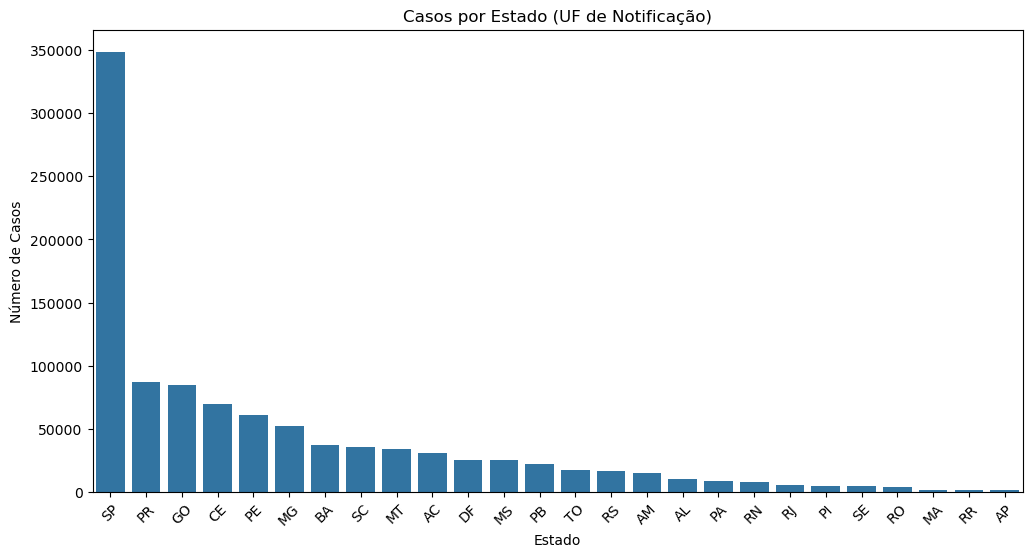

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x='UF de Notificação', data=dfdengue_final, order=dfdengue_final['UF de Notificação'].value_counts().index)
plt.title('Casos por Estado (UF de Notificação)')
plt.xlabel('Estado')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.show()

# Ranking municípios com mais casos

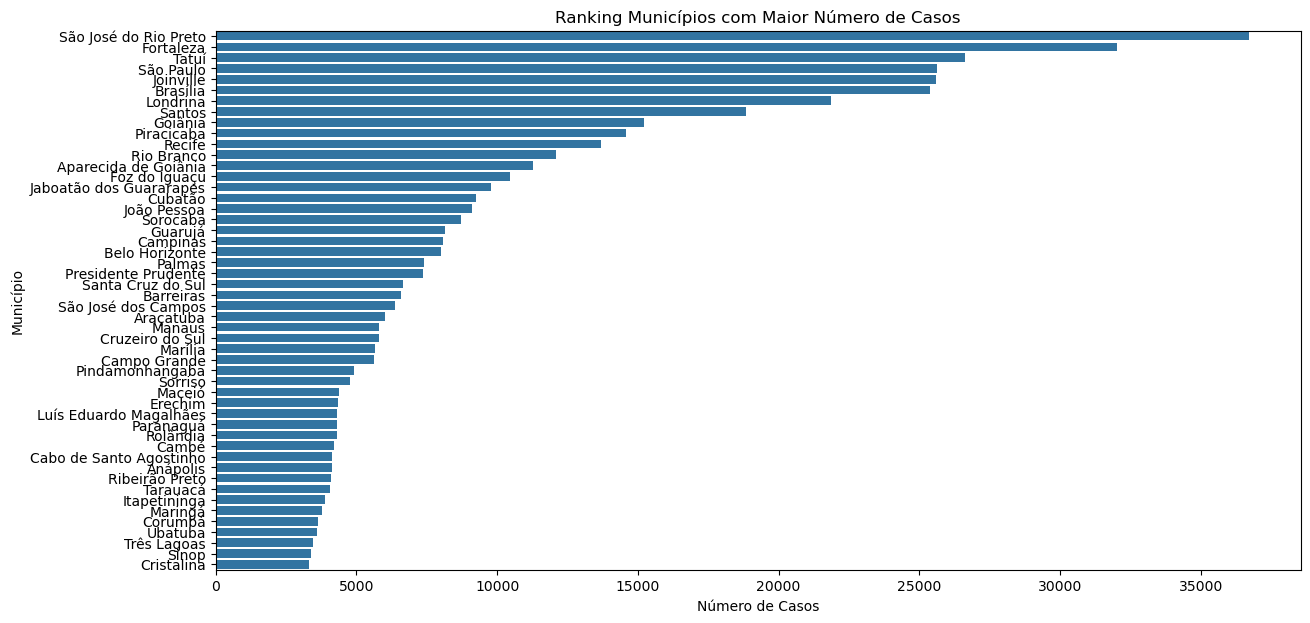

Município de Notificação
São José do Rio Preto      36707
Fortaleza                  32032
Tatuí                      26628
São Paulo                  25610
Joinville                  25577
Brasília                   25377
Londrina                   21864
Santos                     18829
Goiânia                    15205
Piracicaba                 14570
Recife                     13706
Rio Branco                 12099
Aparecida de Goiânia       11263
Foz do Iguaçu              10453
Jaboatão dos Guararapes     9787
Cubatão                     9265
João Pessoa                 9122
Sorocaba                    8717
Guarujá                     8150
Campinas                    8071
Belo Horizonte              8008
Palmas                      7401
Presidente Prudente         7368
Santa Cruz do Sul           6664
Barreiras                   6585
São José dos Campos         6379
Araçatuba                   6015
Manaus                      5820
Cruzeiro do Sul             5810
Marília           

In [118]:
# Contagem de casos por Município
plt.figure(figsize=(14, 7))
top_municipios = dfdengue_final ['Município de Notificação'].value_counts().nlargest(50)
sns.barplot(x=top_municipios.values, y=top_municipios.index)
plt.title('Ranking Municípios com Maior Número de Casos')
plt.xlabel('Número de Casos')
plt.ylabel('Município')
plt.show()

# Calculo de taxa de letalidade por faixa etária

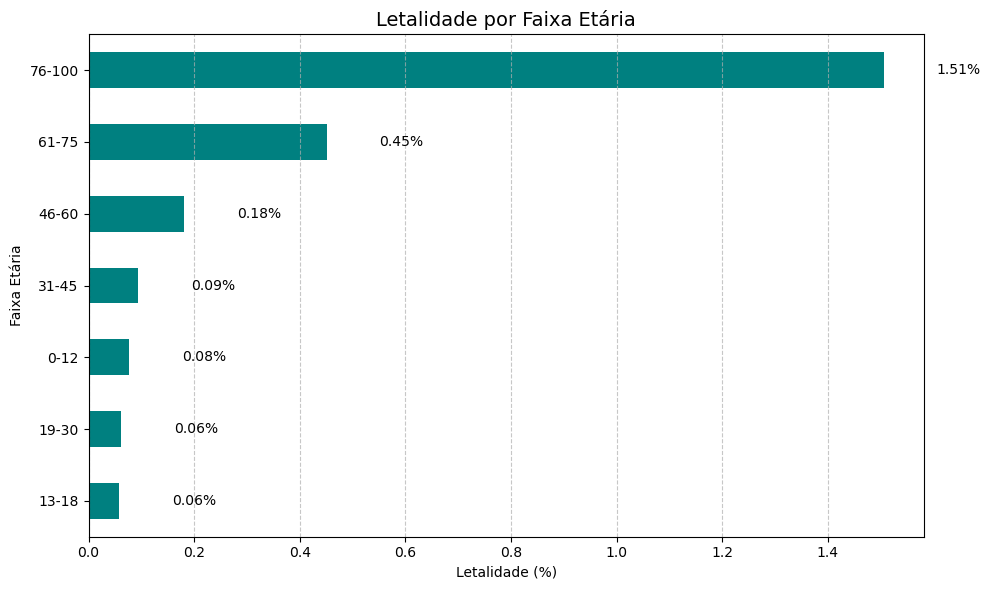

In [52]:
#crio uma coluna binária para guardar se houve óbito
dfdengue_final['Morte'] = np.where(dfdengue_final['Data do óbito'].notna(), 1, 0)

#categorizo as idades em faixas etárias
bins = [0, 12, 18, 30, 45, 60, 75, 100]
labels = ['0-12', '13-18', '19-30', '31-45', '46-60', '61-75', '76-100']

dfdengue_final['Faixa Etária'] = pd.cut(dfdengue_final['Idade'], bins=bins, labels=labels, right=False)

letalidade_por_faixa = dfdengue_final.groupby('Faixa Etária', observed=False)['Morte'].mean() * 100  #converto pra porcentagem

fig, ax = plt.subplots(figsize=(10, 6))
letalidade_por_faixa.sort_values().plot(kind='barh', color='teal', ax=ax)

for index, value in enumerate(letalidade_por_faixa.sort_values()):
    ax.text(value + 0.1, index, f'{value:.2f}%', va='center', color='black')

ax.set_title('Letalidade por Faixa Etária', fontsize=14)
ax.set_xlabel('Letalidade (%)')
ax.set_ylabel('Faixa Etária')
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Pico de casos por mês

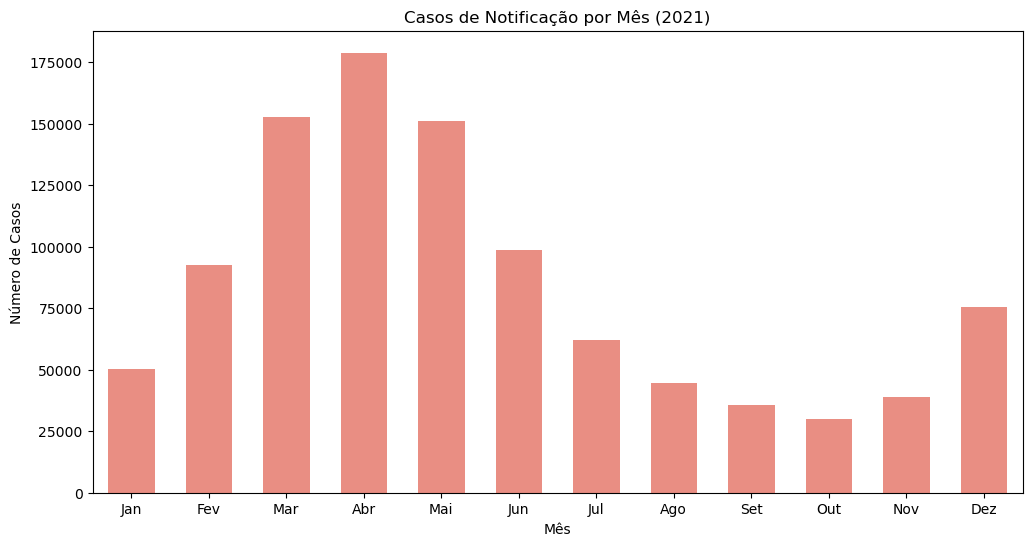

In [54]:
dfdengue_final['Data da Notificação'] = pd.to_datetime(dfdengue_final['Data da Notificação'], errors='coerce')
dfdengue_final['Data dos primeiros sintomas/Diagnóstico'] = pd.to_datetime(dfdengue_final['Data dos primeiros sintomas/Diagnóstico'], errors='coerce')

dfdengue_final['Mês'] = dfdengue_final['Data da Notificação'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(
    x='Mês',
    data=dfdengue_final,
    color='salmon',  # Cor das barras
    width=0.6        #aumento o espaço entre as barras diminuindo a largura
)
plt.title('Casos de Notificação por Mês (2021)')
plt.xlabel('Mês')
plt.ylabel('Número de Casos')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

# Sintomas mais comuns, fortes indicadores de diagnóstico positivo para dengue

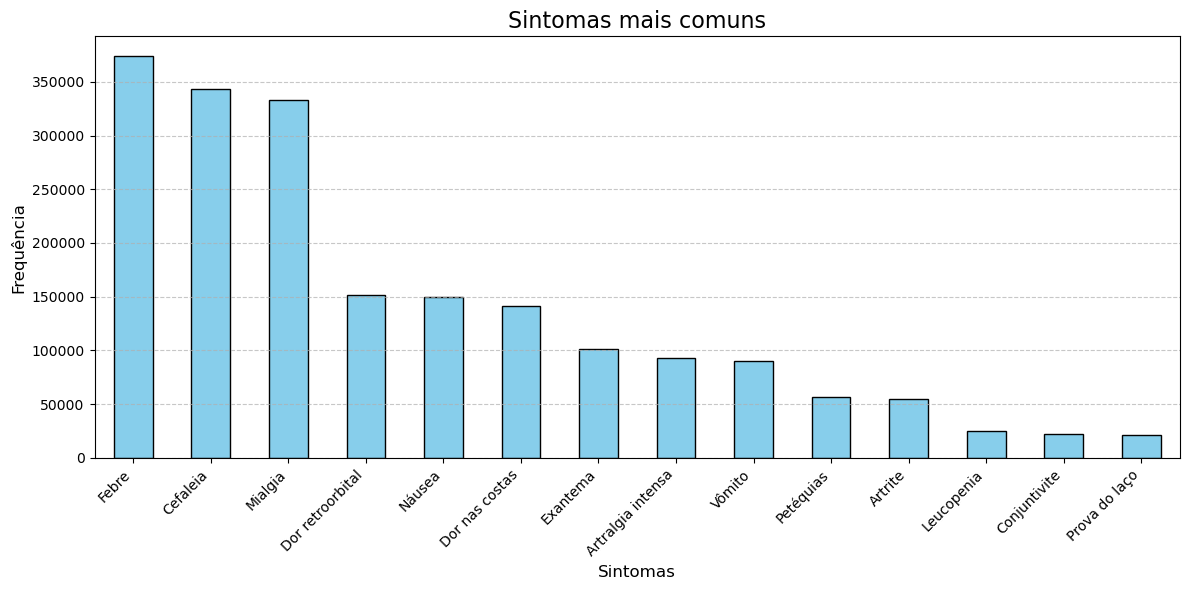

In [56]:
# Lista de sinais clínicos a serem analisados
sinais_clinicos = [
    'Sinais clínicos (Febre)',
    'Sinais clínicos (Mialgia)',
    'Sinais clínicos (Cefaleia)',
    'Sinais clínicos (Exantema)',
    'Sinais clínicos (Vômito)',
    'Sinais clínicos (Náusea)',
    'Sinais clínicos (Dor nas costas)',
    'Sinais clínicos (Conjuntivite)',
    'Sinais clínicos (Artrite)',
    'Sinais clínicos (Artralgia intensa)',
    'Sinais clínicos (Petéquias)',
    'Sinais clínicos (Leucopenia)',
    'Sinais clínicos (Prova do laço)',
    'Sinais clínicos (Dor retroorbital)'
]

#filtro pelos casos inde classificação final do caso é "Dengue"
dengue_cases = dfdengue_final [dfdengue_final ['Classificação final do caso'].str.contains("Dengue", na=False)]

#busco o "Sim" para cada sinal clínico nos casos de dengue
sinais_frequencia = dengue_cases[sinais_clinicos].apply(lambda col: col.str.contains("Sim", na=False).sum())

sinais_frequencia = sinais_frequencia.sort_values(ascending=False)

sinais_frequencia

#renomeio os índices para conter apenas o texto dentro dos parênteses
sinais_frequencia.index = sinais_frequencia.index.str.extract(r'\((.*?)\)')[0]

plt.figure(figsize=(12, 6))
sinais_frequencia.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Sintomas mais comuns', fontsize=16)
plt.xlabel('Sintomas', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [57]:
#exibo os valores únicos
evolucao_caso_unicos = dfdengue_final['Evolução do caso'].unique()

print(evolucao_caso_unicos)

['Cura' nan 'Ignorado' 'Óbito por outras causas' 'Óbito pelo agravo'
 'Óbito em investigação']


# Taxa de Internação

In [120]:
# Filtrar casos com diagnóstico de Dengue
casos_dengue = dfdengue_final [dfdengue_final ['Classificação final do caso'].str.contains('Dengue', na=False, case=False)]

#total dos casos
total_dengue_cases = casos_dengue.shape[0]

#apenas os casos de Dengue com internação
hospitalized_cases = casos_dengue [casos_dengue ['Ocorreu Hospitalização?'] == 'Sim'].shape[0]

#calculo a taxa de internação
hospitalization_rate = (hospitalized_cases / total_dengue_cases) * 100

total_dengue_cases, hospitalized_cases, hospitalization_rate

#crio os dados pro gráfico
hospitalization_data = {
    'Casos Internados': hospitalized_cases,
    'Casos Não Internados': total_dengue_cases - hospitalized_cases
}

plt.figure(figsize=(8, 6))
plt.pie(
    hospitalization_data.values(),
    labels=hospitalization_data.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=['orange', 'lightblue']
)
plt.title('Proporção de Casos de Dengue com e sem Hospitalização')
plt.tight_layout()
plt.show()

(447884, 15372, 3.432138678765037)

# Eficácia e rapidez dos diagnósticos por Município

Tempo médio global entre sintomas e coleta do exame: 7.59 dias


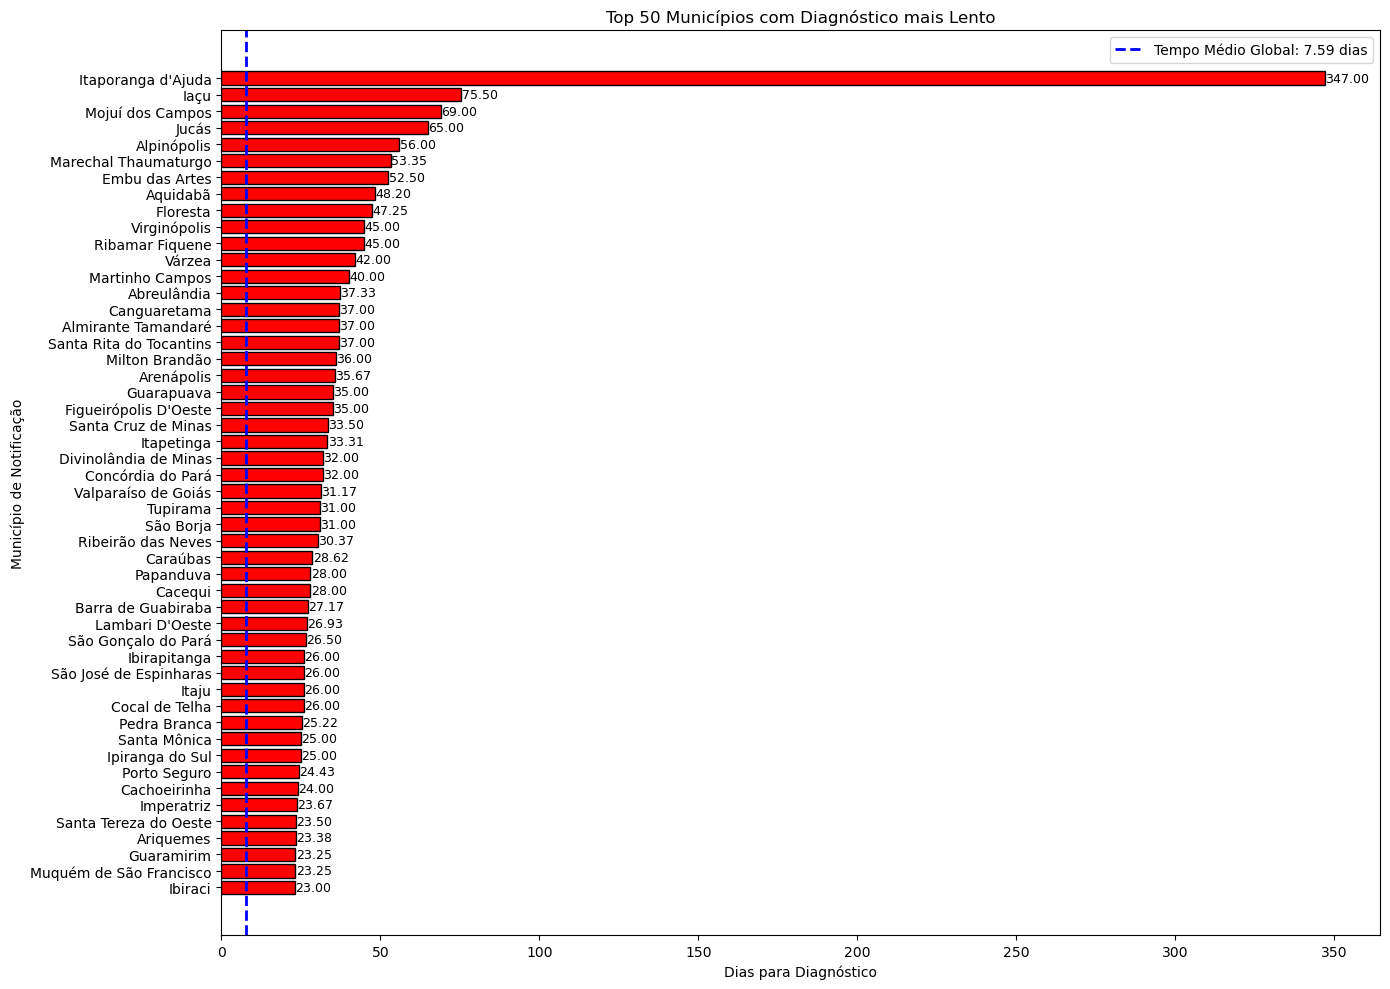

In [61]:
dfdengue_positivos = dfdengue_final[dfdengue_final['Resultado (Exame sorológico IgM Dengue)'] == 'Positivo'].copy()

#calculo da diferença em dias entre data dos primeiros sintomas e data da coleta do exame
dfdengue_positivos.loc[:, 'Dias_Diagnostico'] = (
    pd.to_datetime(dfdengue_positivos['Data da coleta (Exame sorológico IgM Dengue)'], errors='coerce') -
    pd.to_datetime(dfdengue_positivos['Data dos primeiros sintomas/Diagnóstico'], errors='coerce')
).dt.days

tempo_medio_global = dfdengue_positivos['Dias_Diagnostico'].mean()
print(f"Tempo médio global entre sintomas e coleta do exame: {tempo_medio_global:.2f} dias")

efetividade_municipio = dfdengue_positivos.groupby('Município de Notificação')['Dias_Diagnostico'].mean().reset_index()

#ordeno para visualizar os municípios com diagnóstico mais lento ao mais rápido
efetividade_municipio_ordenada = efetividade_municipio.sort_values(by='Dias_Diagnostico', ascending=False)
top_50_lentos = efetividade_municipio_ordenada.dropna().head(50)

plt.figure(figsize=(14, 10))
bars = plt.barh(top_50_lentos['Município de Notificação'], top_50_lentos['Dias_Diagnostico'], color='red', edgecolor='black')
plt.xlabel('Dias para Diagnóstico')
plt.ylabel('Município de Notificação')
plt.title('Top 50 Municípios com Diagnóstico mais Lento')

plt.gca().invert_yaxis()

plt.axvline(tempo_medio_global, color='blue', linestyle='--', linewidth=2, label=f'Tempo Médio Global: {tempo_medio_global:.2f} dias')

for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=9)

plt.legend()

plt.tight_layout()
plt.show()

In [62]:
#quantidade de colunas presentes no dataframe
quantidade_colunas = len(dfdengue_final.columns)
print(f"{quantidade_colunas}")

103


In [63]:
#todos os valores únicos
evolucao_caso_unicos = dfdengue_final['Classificação final do caso'].unique()

print(evolucao_caso_unicos)

['Descartado' 'Dengue' 'Dengue com sinais de alarme' nan 'Dengue grave']


# Dispersão entre os possíveis diagnósticos

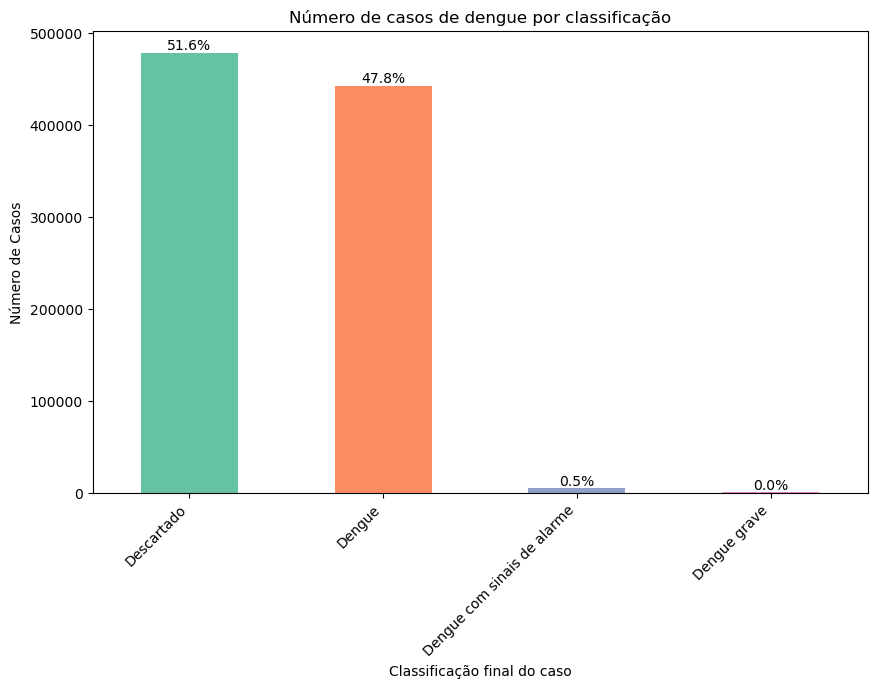

In [65]:
contagem = dfdengue_final['Classificação final do caso'].value_counts()
percentuais = dfdengue_final['Classificação final do caso'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
ax = contagem.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854'])

for idx, valor in enumerate(contagem):
    porcentagem = percentuais.iloc[idx]  # Usando iloc para acessar a porcentagem pela posição
    ax.text(idx, valor + 1, f'{porcentagem:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Número de casos de dengue por classificação')
plt.ylabel('Número de Casos')
plt.xlabel('Classificação final do caso')

plt.xticks(rotation=45, ha='right')
plt.show()

# Ranking municípios com mais mortes

C:\Users\Robson\AppData\Local\Temp\ipykernel_1148\1677098808.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', len(estados))


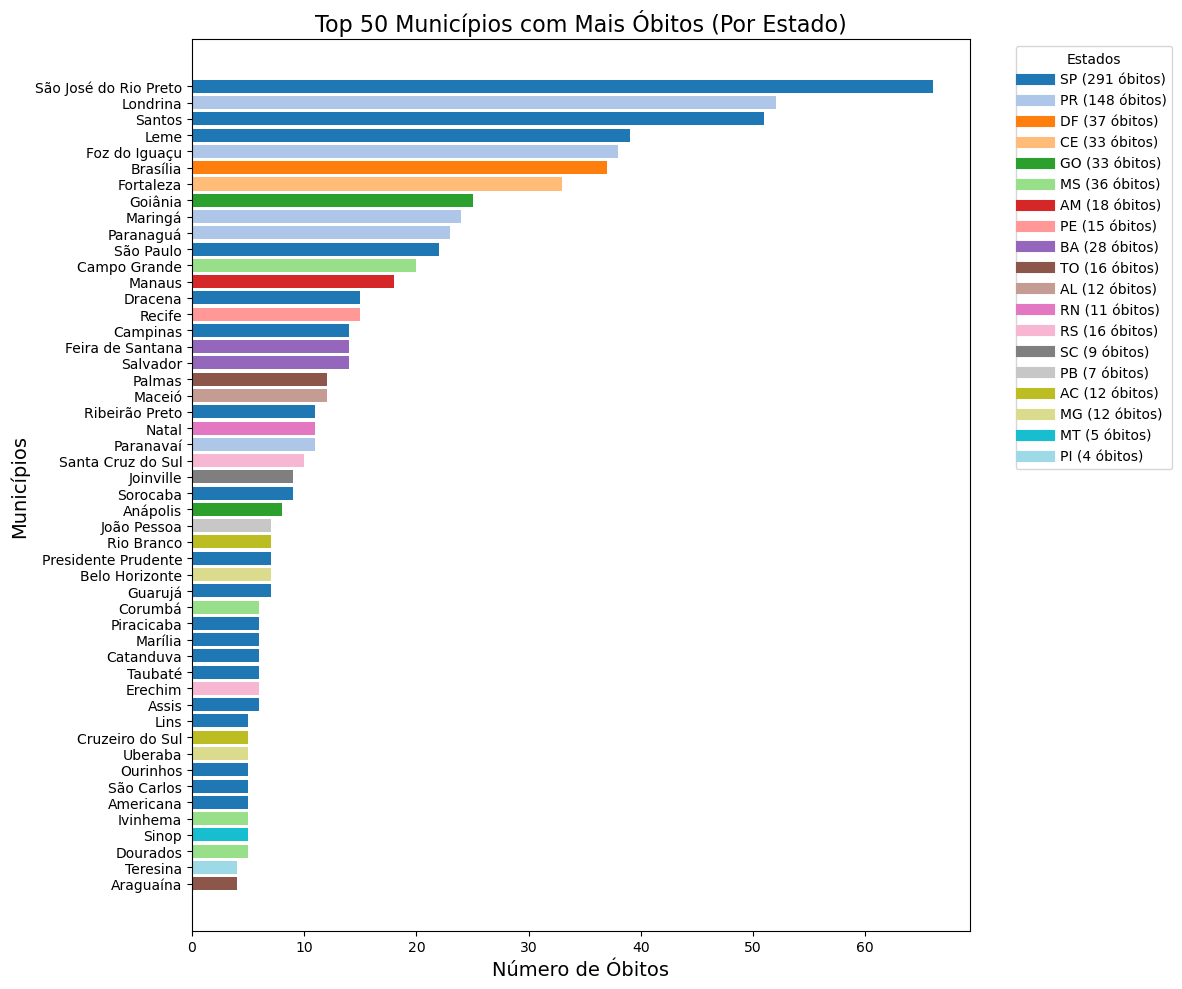

In [66]:
df_obitos = dfdengue_final[dfdengue_final['Data do óbito'].notna()]

obitos_por_municipio = df_obitos['Município (Hospitalização)'].value_counts()

#pego os 50 municípios com mais óbitos
top_municipios = obitos_por_municipio.head(50)

import matplotlib.cm as cm  #pra mapear cores

df_obitos = dfdengue_final[dfdengue_final['Data do óbito'].notna()]

obitos_por_municipio_estado = df_obitos.groupby(['Município (Hospitalização)', 'UF (Hospitalização)']).size().reset_index(name='Óbitos')
obitos_por_municipio_estado = obitos_por_municipio_estado.sort_values(by='Óbitos', ascending=False).head(50)

obitos_por_estado_filtrado = obitos_por_municipio_estado.groupby('UF (Hospitalização)')['Óbitos'].sum()

#mapeando cores para cada estado
estados = obitos_por_municipio_estado['UF (Hospitalização)'].unique()
cmap = cm.get_cmap('tab20', len(estados))
estado_cores = {estado: cmap(i) for i, estado in enumerate(estados)}

cores = obitos_por_municipio_estado['UF (Hospitalização)'].map(estado_cores)


#############GRÁFICO
plt.figure(figsize=(12, 10))
plt.barh(obitos_por_municipio_estado['Município (Hospitalização)'], obitos_por_municipio_estado['Óbitos'], color=cores)

plt.title('Top 50 Municípios com Mais Óbitos (Por Estado)', fontsize=16)
plt.xlabel('Número de Óbitos', fontsize=14)
plt.ylabel('Municípios', fontsize=14)
plt.gca().invert_yaxis()

handles = [
    plt.Line2D([0], [0], color=cor, linewidth=8, label=f"{estado} ({obitos_por_estado_filtrado[estado]} óbitos)")
    for estado, cor in estado_cores.items()
]
plt.legend(handles=handles, title='Estados', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()  # Ajustar espaçamento
plt.show()

# Ranking estados com mais mortes

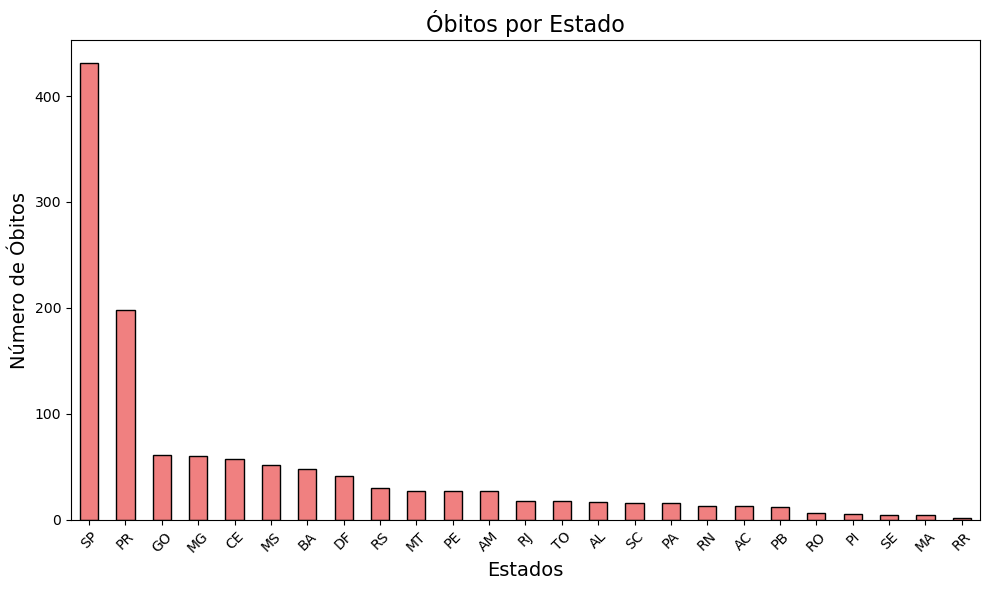

In [67]:
df_obitos = dfdengue_final[dfdengue_final['Data do óbito'].notna()]

obitos_por_estado = df_obitos['UF (Hospitalização)'].value_counts()

plt.figure(figsize=(10, 6))
obitos_por_estado.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Óbitos por Estado', fontsize=16)
plt.xlabel('Estados', fontsize=14)
plt.ylabel('Número de Óbitos', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()  # Ajustar espaçamento
plt.show()